# Module 5 

#  Modern Portfolio Theory

Importing libraries

In [1]:
import pandas as pd #Data-Wrangling library
import numpy as np #Numerical Python Library
import matplotlib.pyplot as plt #Data-Visualization library
import seaborn as sns #Data-Visualization library

In [2]:
#Setting up precision to 6 decimal places
pd.set_option('precision',6)

## 5.1

In [3]:
#Importing dataset
df = pd.read_csv('Datasets/INFY.csv')

In [4]:
#First five rows
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFY,EQ,15-May-2017,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67
1,INFY,EQ,16-May-2017,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62
2,INFY,EQ,17-May-2017,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35
3,INFY,EQ,18-May-2017,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32
4,INFY,EQ,19-May-2017,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48


In [5]:
#Calculating average and standard deviation of daily return
daily_mean = ((df['Close Price'] - df['Prev Close']) / df['Prev Close']).mean()
daily_sd = ((df['Close Price'] - df['Prev Close']) / df['Prev Close']).std()

print(f"Daily return Mean:{daily_mean :.6f}")
print(f"Daily return Standard Deviation {daily_sd:.6f}")

Daily return Mean:-0.000910
Daily return Standard Deviation 0.031804


In [6]:
#Expected mean annual return and volatility of that stock
annual_return = daily_mean * 252
volatility = daily_mean * np.sqrt(252)

print(f"Expected mean annual daily return:{annual_return :.6f}")
print(f"Expected annual volatility:{volatility :.6f}")

Expected mean annual daily return:-0.229436
Expected annual volatility:-0.014453


## 5.2 

In [8]:
#Building portfolio

#Importing five stocks

df_idfc = pd.read_csv('Datasets/Small_Cap/IDFC.csv')
df_cipla = pd.read_csv('Datasets/Large_Cap/CIPLA.csv')
df_gail = pd.read_csv('Datasets/Large_Cap/GAIL.csv')
df_maruti = pd.read_csv('Datasets/Large_Cap/MARUTI.csv')
df_reliance = pd.read_csv('Datasets/Large_Cap/RELIANCE.csv')

In [9]:
#Data Preprocessing

df_idfc['Daily_returns'] = df_idfc['Close Price'] - df_idfc['Prev Close']
df_cipla['Daily_returns'] = df_cipla['Close Price'] - df_cipla['Prev Close']
df_gail['Daily_returns'] = df_gail['Close Price'] - df_gail['Prev Close']
df_maruti['Daily_returns'] = df_maruti['Close Price'] - df_maruti['Prev Close']
df_reliance['Daily_returns'] = df_reliance['Close Price'] - df_reliance['Prev Close']


df = pd.concat([df_idfc['Daily_returns'], df_cipla['Daily_returns'], df_gail['Daily_returns'],
              df_maruti['Daily_returns'], df_reliance['Daily_returns']], axis = 1)

#Renaming columns
df.columns = ['Idfc', 'Cipla', 'Gail', 'Maruti', 'Reliance']

#Removing rows with missing values
df.dropna(inplace = True)

In [10]:
#Expected annual return of entire portfolio


expected_annual_return = 252 * 0.2 * (df['Idfc'].mean() + df['Cipla'].mean() + df['Gail'].mean() + df['Maruti'].mean()
                                        + df['Reliance'].mean())

print(f"Expected annual return of entire portfolio is: {expected_annual_return :.3f}")

Expected annual return of entire portfolio is: 564.832


In [11]:
#Annual Volatility of the entire portfolio

#Covariance matrix 
cov_mat = df.cov()
cov_mat_annual = 252 * cov_mat

#Weight matrix
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

annual_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_mat_annual, weights)))

print(f"Annual volatility of the entire portfolio is: {annual_volatility :.3f}")

Annual volatility of the entire portfolio is: 1261.660


## 5.3

In [12]:
#Scatter Plot for differing value of weights

#Calculating returns and volatility for entire different weights

weights = []

for i in range(1 , 21):
    for j in range(1, 21):
        for k in range(1, 21):
            for l in range(1, 21):
                    if(i + j + k + l < 100):
                        weights.append([i, j, k, l, 100 - (i + j + k + l)])

In [13]:
#Converting weights list into numpy array
weights = np.array(weights)

In [14]:
weights  = weights / 100

In [15]:
#Calculating returns for different weights
returns = weights * [df['Idfc'].mean(), df['Cipla'].mean(), df['Gail'].mean(), df['Maruti'].mean(), df['Reliance'].mean()]
returns  = returns.sum(axis = 1) * 252

In [16]:
returns = pd.DataFrame(returns)

In [17]:
#Calculating volatility for different weights
volatility = []

for weight in weights:
    volatility.append(np.sqrt(np.dot(weight.T, np.dot(cov_mat_annual, weight))))

In [18]:
volatility = pd.DataFrame(volatility)

In [19]:
#New Dataframe df

df = pd.concat([returns, volatility], axis = 1)
df.columns = ['Returns', 'Volatility']

In [20]:
#Calculating Sharp ratio
df['Sharp'] = df['Returns'] / df['Volatility']

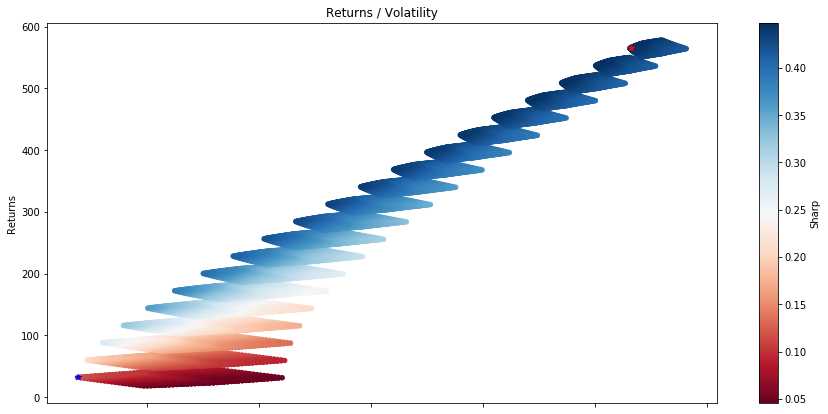

In [21]:
#Scatter plot
ax = df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharp', figsize = (15, 7), colormap='RdBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Returns / Volatility')


#Portfolio with highest sharp ratio
sharp_max = df['Sharp'].idxmax()
plt.plot(df.loc[sharp_max, 'Volatility'], df.loc[sharp_max,'Returns'], 'r*')


#Portfolio with the lowest volatility
vol_min = df['Volatility'].idxmin()
plt.plot(df.loc[vol_min, 'Volatility'], df.loc[vol_min,'Returns'], 'b*')

The blue marker represents portfolio with highest sharp ratio and blue marker represents portfolio with lowest sharp ratio.